In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
# imporattion de nos données preparées 
bilan = pd.read_csv('bilan.csv')
bilan.set_index('Zone',inplace = True)

# Clustering 

## Classification ascendante hiérarchique

La classification hiérarchique permet de créer un arbre qui regroupe les différents individus, de façon plus ou moins forte, en fonction de la profondeur choisie.

In [5]:
# dans array numpy
X = bilan.values 
pays = bilan.index
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_cr = std_scale.transform(X)
# Clustering hiérarchique avec librairie scipy
Z = linkage(X_cr, method='ward')

On espère avoir une moyenne à 0 et un écart type à 1 : 

In [6]:
idx = ["mean", "std"]

pd.DataFrame(X_cr).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean  0.0 -0.0  0.0  0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

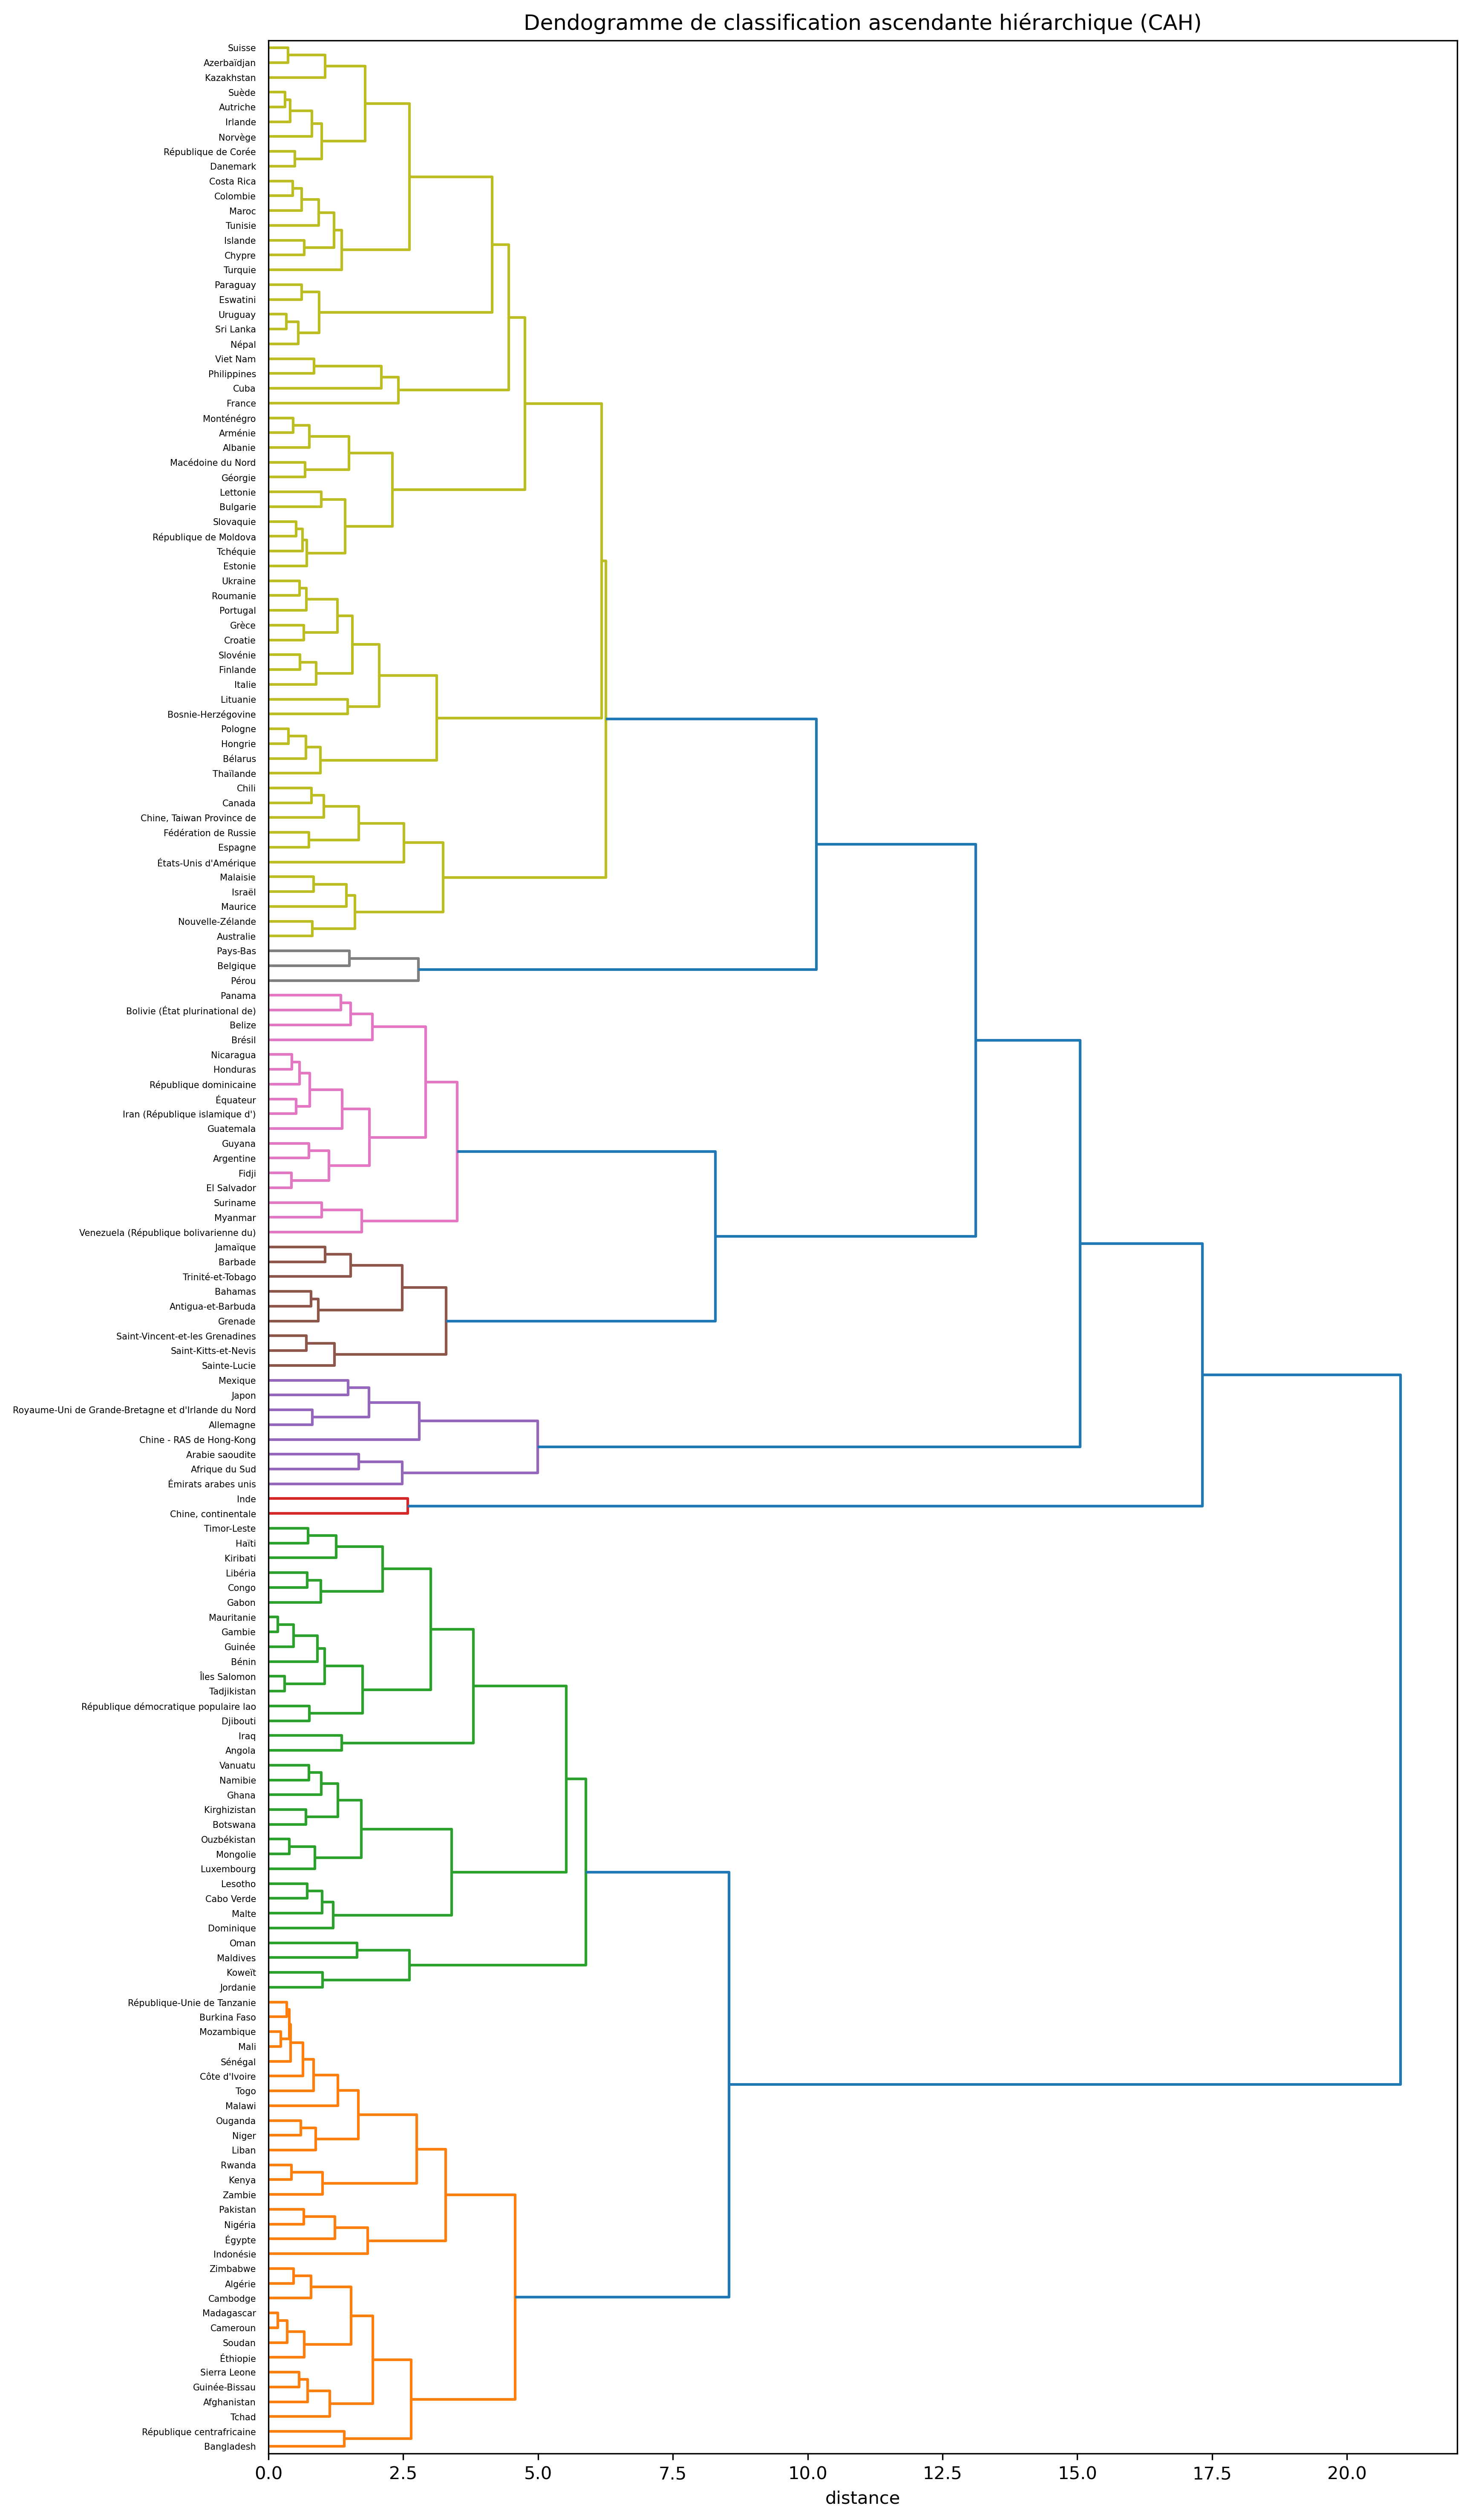

In [7]:
# Affichage du dendogramme
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    Z,
    labels = pays,
    orientation = "right",
    color_threshold=7
)
plt.savefig('dendogram.png')
plt.show()

Je vais me contenter de découper en 6 groupes pour visualiser et pouvoir comparer assez facilement mes groupes.

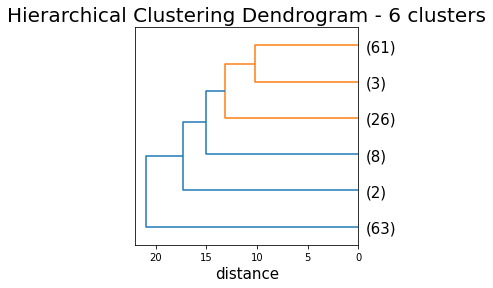

In [8]:
#Découpage du dendrogramme en 6 groupes
fig = plt.figure(figsize=(4,4))
plt.title('Hierarchical Clustering Dendrogram - 6 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = pays, p=6, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()


### Attribution des 6 groupes

In [9]:
#Identification des 6 groupes obtenus
groupes_cah = fcluster(Z, 6, criterion='maxclust')
#index triés des groupes
idg = np.argsort(groupes_cah)
#Affichage des pays selon leurs groupes
df = pd.DataFrame(bilan.index[idg], groupes_cah[idg]).reset_index()
df2 = df.rename(columns={'index':'Groupe'})
df2.head()

Groupe         Zone
0       1  Afghanistan
1       1        Malte
2       1         Mali
3       1     Maldives
4       1       Malawi

In [10]:
#Jointure interne nécessaire pour parvenir à agréger nos données
df3 = pd.merge(bilan, df2, on='Zone')
df3.set_index('Zone', inplace=True)
display(df3.head(5))


Importations - Quantité  production/nourriture (%)  \
Zone                                                                 
Afghanistan                        29.0                  50.909091   
Afrique du Sud                    514.0                  81.916462   
Albanie                            38.0                  27.659574   
Algérie                             2.0                 104.166667   
Allemagne                         842.0                  94.095712   

                nourrVolaille/nourritTotal (%)  evo_demo_2012_2017(%)  \
Zone                                                                    
Afghanistan                           0.424121              14.146796   
Afrique du Sud                        6.414297               7.326988   
Albanie                               1.294409              -1.037630   
Algérie                               0.798645               9.677150   
Allemagne                             2.063138               2.039455   

                  Nbr pop  SFFA  Groupe  
Zone                                     
Afghanistan     36296.113  44.2       1  
Afrique du Sud  57009.756  66.7       3  
Albanie          2884.169  67.0       6  
Algérie         41389.189  48.5       1  
Allemagne       82658.409  79.3       3

Affichage graphique :

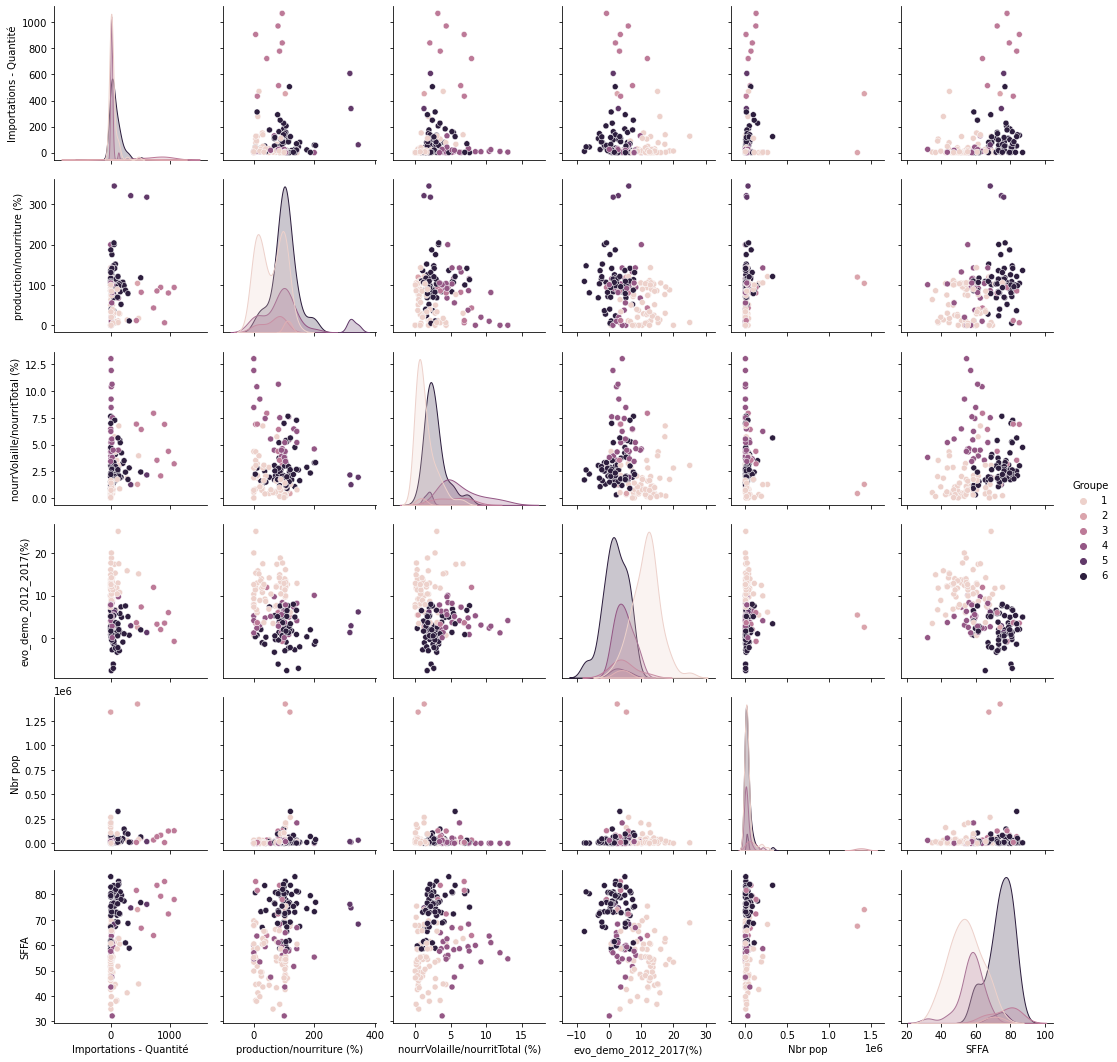

In [11]:
sns.pairplot(df3, hue='Groupe')

Afficher les moyennes des variables de chaque groupe

In [12]:
groupe=(1,2,3,4,5,6)
for n in groupe:
    affi=df3.loc[df3['Groupe']==n].mean()
    print(affi)

Importations - Quantité              34.904762
production/nourriture (%)            56.552910
nourrVolaille/nourritTotal (%)        1.412831
evo_demo_2012_2017(%)                11.459806
Nbr pop                           28974.695794
SFFA                                 53.990476
Groupe                                1.000000
dtype: float64
Importations - Quantité           2.260000e+02
production/nourriture (%)         1.118301e+02
nourrVolaille/nourritTotal (%)    8.449867e-01
evo_demo_2012_2017(%)             4.018093e+00
Nbr pop                           1.379849e+06
SFFA                              7.075000e+01
Groupe                            2.000000e+00
dtype: float64
Importations - Quantité             779.750000
production/nourriture (%)            61.976467
nourrVolaille/nourritTotal (%)        5.164477
evo_demo_2012_2017(%)                 4.634224
Nbr pop                           63571.297375
SFFA                                 76.300000
Groupe                        

### Les 6 clusters

In [13]:
groupe=(1,2,3,4,5,6)
for n in groupe:
    affi=df3.loc[df3['Groupe']==n].index
    print(f"Group {n}:",affi)
    print(" ")

Group 1: Index(['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Botswana',
       'Burkina Faso', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Congo',
       'Côte d'Ivoire', 'Djibouti', 'Dominique', 'Gabon', 'Gambie', 'Ghana',
       'Guinée', 'Guinée-Bissau', 'Haïti', 'Indonésie', 'Iraq', 'Jordanie',
       'Kenya', 'Kirghizistan', 'Kiribati', 'Koweït', 'Lesotho', 'Liban',
       'Libéria', 'Luxembourg', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Malte', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Niger',
       'Nigéria', 'Oman', 'Ouganda', 'Ouzbékistan', 'Pakistan', 'Rwanda',
       'République centrafricaine', 'République démocratique populaire lao',
       'République-Unie de Tanzanie', 'Sierra Leone', 'Soudan', 'Sénégal',
       'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Vanuatu', 'Zambie',
       'Zimbabwe', 'Égypte', 'Éthiopie', 'Îles Salomon'],
      dtype='object', name='Zone')
 
Group 2: Index(['Chine, continentale', 'Inde'], dtype='object', name

### Répartition géographique des clusters

In [14]:
iso_alpha = pd.read_csv('code iso.csv')
df3_map = pd.merge(df3, iso_alpha, on='Zone',how='outer', indicator=True)


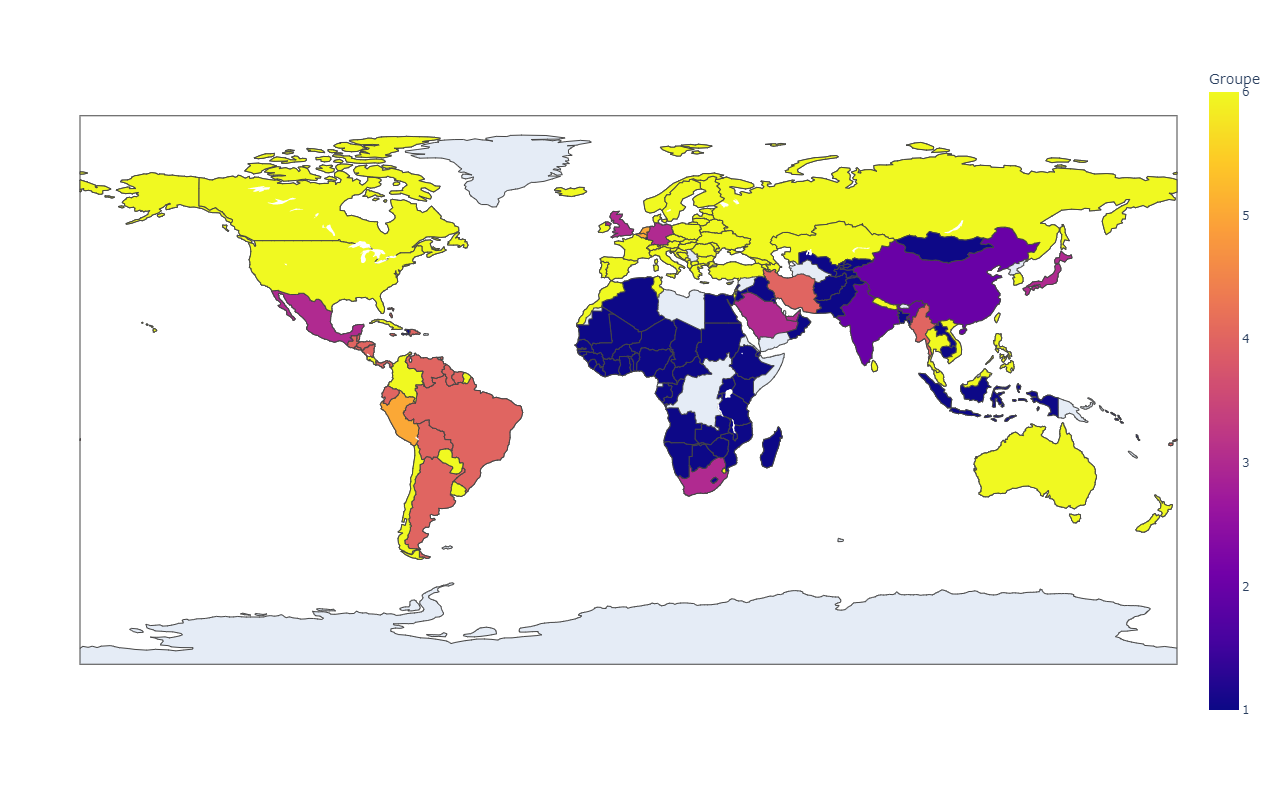

In [15]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df3_map, locations="iso",
                    color="Groupe", # lifeExp is a column of gapminder
                    hover_name="Zone", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,width=1000, height=800)
fig.show()

### Représentation des variables de chaque groupe après normalisation en visualisation heatmap

<AxesSubplot:ylabel='Groupe'>

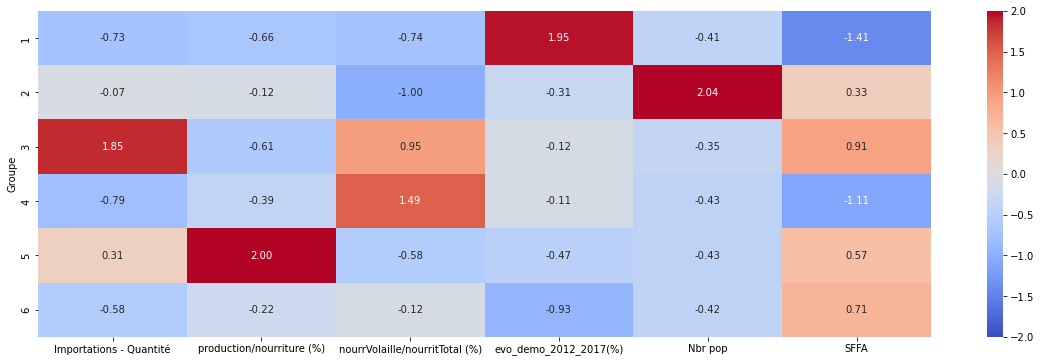

In [18]:
df4=df3.groupby(['Groupe'],as_index= True)["Importations - Quantité",'production/nourriture (%)',
                                       'nourrVolaille/nourritTotal (%)','evo_demo_2012_2017(%)','Nbr pop','SFFA'].mean()
# La normalisation des moyenne
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df4)
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_mean_norm, vmin=-2, vmax=2, annot=True, cmap="coolwarm", fmt="0.2f")

### Représentation de la distribution des variables par groupe en utilisant une boite à moustache

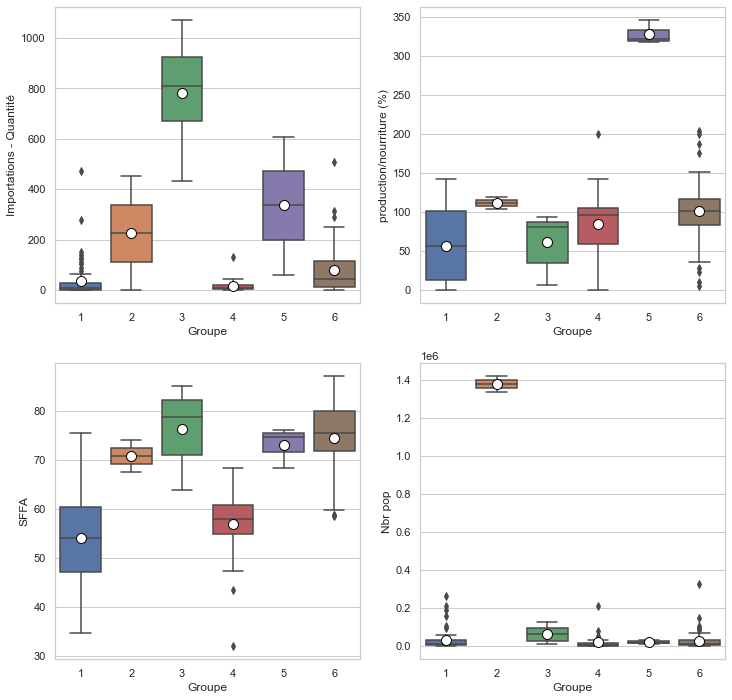

In [15]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='Importations - Quantité', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='production/nourriture (%)', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.subplot(223)
sns.boxplot(data=df3, x='Groupe', y='SFFA', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.subplot(224)
sns.boxplot(data=df3, x='Groupe', y='Nbr pop', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.savefig('Distribution des variables par groupe.jpg')

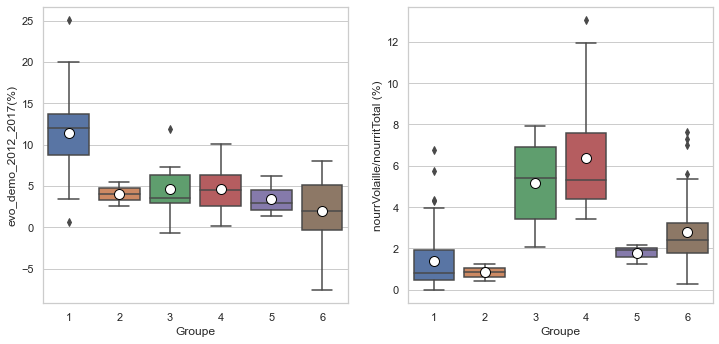

In [16]:
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='evo_demo_2012_2017(%)', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='nourrVolaille/nourritTotal (%)', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.savefig('Distribution des variables par groupe_suite.jpg')

### Observations

Nous cherchons le groupe qui se caractérise en ordre de priorité par : 

     1. Quantité importante d'importation
     2. Rapport "production/nourriture" bas 
     3. Score de facilité à faire des affaires élevées
     4. Nombre de populations élevées
     5. Taux de croissance démographique élevé
     6. Rapport "nourritureVollaile / nourritureTotal" élevé

     
En analysant la heatmap et les représentations en boîte à moustache, on retient le groupe 3 qui satisfait le plus nos critères.

Groupe 3 : 'Afrique du Sud', 'Allemagne', 'Arabie saoudite',
       'Chine - RAS de Hong-Kong', 'Japon', 'Mexique',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'Émirats arabes unis'.


## Algorithme k-means

### Recherche et vérification du nombre de clusters 

K-Means est un algorithme simple d’apprentissage non supervisé utilisé pour résoudre les problèmes de clustering. Il suit une procédure simple, consistant à classer un ensemble de données dans un nombre de clusters, défini par la lettre « k« , qui est fixé au préalable.

On positionne ensuite les clusters comme des points. On associe tous les observations ou points de données au cluster le plus proche, calculés et ajustés. Puis, le processus recommence en utilisant les nouveaux ajustements jusqu’à ce qu’un résultat souhaité soit atteint.

#### Méthode du coude

Pour déterminer le nombre de clusters à étudier, on s'intéresse au graphique qui trace l'inertie intraclasse en fonction du nombre de clusters. On cherche plus particulièrement une "cassure" dans la courbe. 

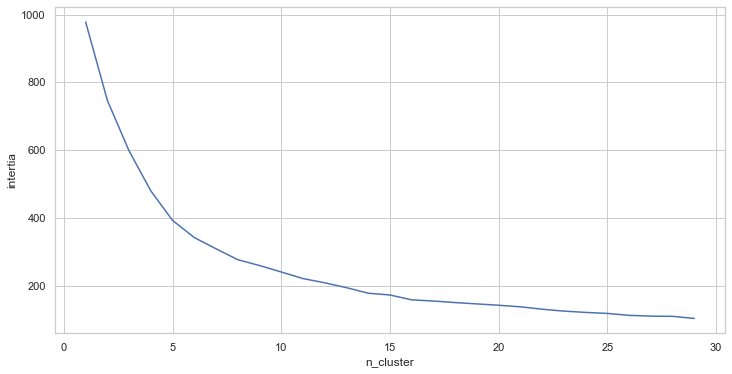

In [17]:
intertia = []
k_list = range(1, 30)
list(k_list)
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_cr) 
  intertia.append(kmeans.inertia_)
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

#### Coefficient de silhouette

In [18]:
#librairie pour évaluation des partitions
from sklearn import metrics
#faire varier le nombre de clusters de 2 à 15 avec la méthode des silhouettes
res = np.arange ( 14, dtype ="double" )
for k in np.arange(14):
    kms = KMeans(n_clusters = k+2)
    kms.fit(X_cr)
    res[k] = metrics.silhouette_score(X_cr, kms.labels_)
print(res)

[0.25270685 0.27745735 0.30549998 0.31698287 0.24727529 0.27430677
 0.27056111 0.24001182 0.2564084  0.25815894 0.2616671  0.25782409
 0.26850252 0.2471188 ]


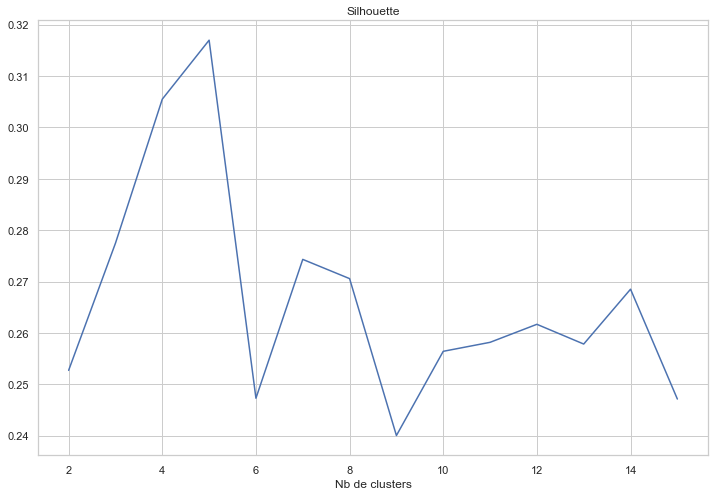

In [19]:
plt.figure(figsize=(12,8))
plt.title("Silhouette")
plt.xlabel("Nb de clusters")
plt.plot(np.arange(2,16,1), res)
plt.show()

### Observation

En vu d'un partitionnement optimal, nous avons couplé 2 méthodes :
 
   - Méthode du coude
       - Avec la méthode du coude, Le nombre optimal de clusters est le point représentant le coude. Ici, le coude peut être représenté par K valant entre 5 et 10. C’est le nombre optimal de clusters.
   - Coefficient de silhouette
       - Comme pour la méthode du coude cette fois-ci, nous affichons l'évolution du coefficient de silhouette en fonction du nombre de            clusters. Le nombre de 6 clusters donne bien le coefficient de silhouette le plus élevé :  0.33
   
On décide de découper en 6 groupes.


### Attribution des 6 groupes

In [20]:
# Récupération des clusters attribués à chaque individu
# Nombre de clusters souhaités
n_clust = 6
# Clustering par K-means avec librairie sklearn sur les données centrées réduites
km = KMeans(n_clusters=n_clust)
km.fit(X_cr)
clusters_km = km.labels_
clusters_km

array([3, 5, 4, 3, 5, 3, 0, 5, 0, 4, 4, 4, 4, 0, 3, 0, 1, 0, 0, 4, 3, 0,
       4, 3, 4, 3, 3, 3, 3, 4, 0, 5, 4, 2, 4, 4, 3, 4, 4, 4, 3, 4, 3, 0,
       4, 4, 4, 4, 4, 4, 5, 4, 3, 3, 3, 0, 4, 0, 3, 3, 0, 4, 3, 0, 1, 2,
       4, 0, 3, 4, 4, 0, 4, 0, 5, 0, 4, 3, 3, 3, 0, 3, 4, 3, 3, 4, 3, 4,
       3, 0, 3, 3, 3, 4, 4, 0, 3, 5, 3, 4, 3, 0, 3, 0, 3, 3, 4, 4, 4, 3,
       3, 3, 3, 0, 3, 1, 3, 1, 4, 1, 4, 5, 3, 3, 4, 4, 0, 3, 3, 0, 0, 0,
       3, 4, 4, 3, 4, 4, 0, 4, 3, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 4, 3, 0,
       4, 3, 3, 3, 5, 0, 4, 3, 3])

In [21]:
dd = {i:j for i,j in enumerate(list("012345"))}
dd

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}

In [22]:
labels = [dd[i] for i in km.labels_]
labels[:10]

['3', '5', '4', '3', '5', '3', '0', '5', '0', '4']

In [23]:
bilan_1=bilan
bilan_1["cluster"] = labels
bilan_1


Importations - Quantité  production/nourriture (%)  \
Zone                                                                        
Afghanistan                               29.0                  50.909091   
Afrique du Sud                           514.0                  81.916462   
Albanie                                   38.0                  27.659574   
Algérie                                    2.0                 104.166667   
Allemagne                                842.0                  94.095712   
...                                        ...                        ...   
Émirats arabes unis                      433.0                  11.650485   
Équateur                                   0.0                 104.938272   
États-Unis d'Amérique                    123.0                 121.071823   
Éthiopie                                   1.0                 100.000000   
Îles Salomon                               6.0                   0.000000   

                       nourrVolaille/nourritTotal (%)  evo_demo_2012_2017(%)  \
Zone                                                                           
Afghanistan                                  0.424121              14.146796   
Afrique du Sud                               6.414297               7.326988   
Albanie                                      1.294409              -1.037630   
Algérie                                      0.798645               9.677150   
Allemagne                                    2.063138               2.039455   
...                                               ...                    ...   
Émirats arabes unis                          6.915072               3.642876   
Équateur                                     3.423138               7.811926   
États-Unis d'Amérique                        5.620490               3.396305   
Éthiopie                                     0.036362              12.850516   
Îles Salomon                                 0.715990              12.574072   

                          Nbr pop  SFFA cluster  
Zone                                             
Afghanistan             36296.113  44.2       3  
Afrique du Sud          57009.756  66.7       5  
Albanie                  2884.169  67.0       4  
Algérie                 41389.189  48.5       3  
Allemagne               82658.409  79.3       5  
...                           ...   ...     ...  
Émirats arabes unis      9487.203  81.6       5  
Équateur                16785.361  57.6       0  
États-Unis d'Amérique  325084.756  83.6       4  
Éthiopie               106399.924  47.1       3  
Îles Salomon              636.039  55.2       3  

[163 rows x 7 columns]

Affichage graphique :

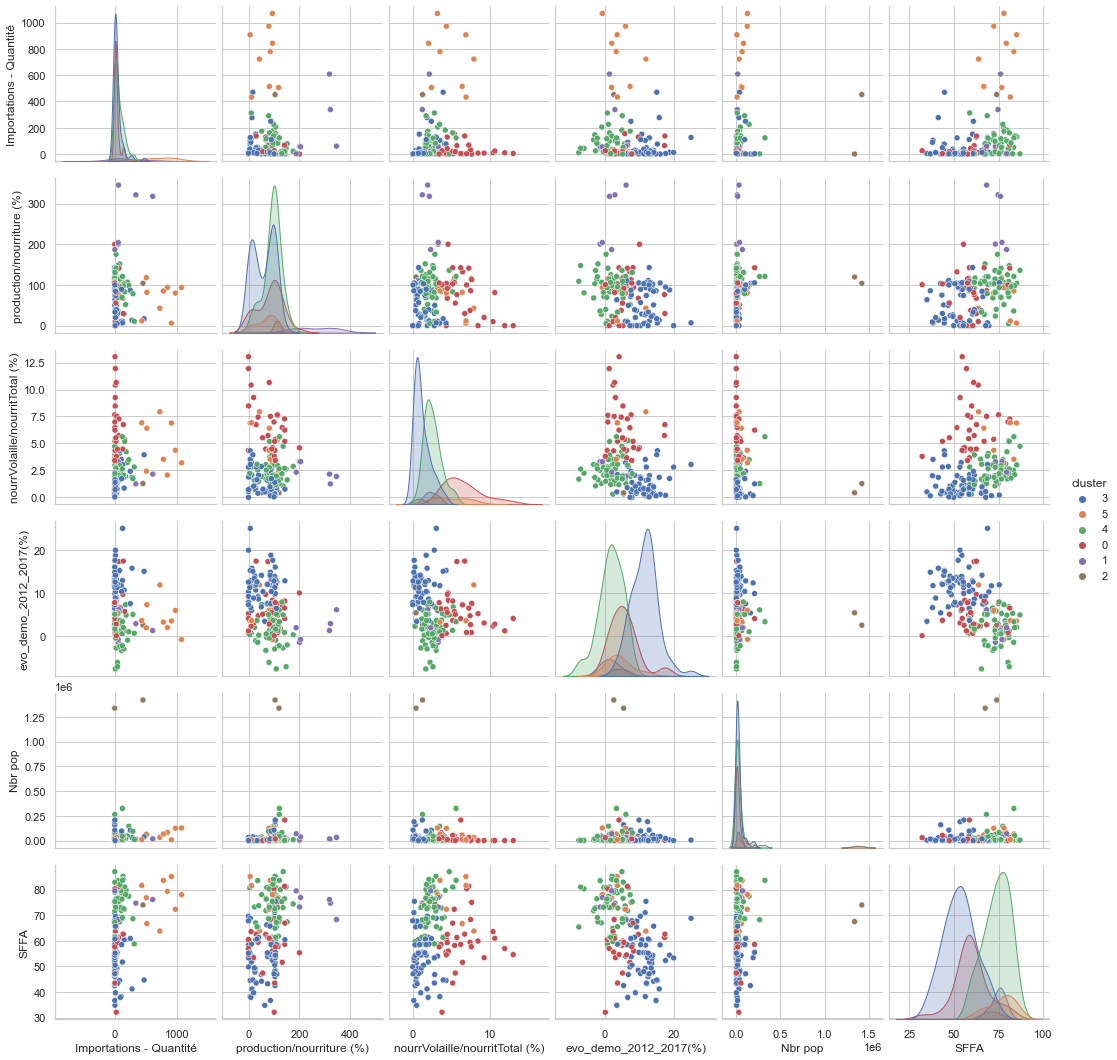

In [24]:
sns.pairplot(bilan_1, hue='cluster')

In [25]:
# affichage des centroides
# df5=bilan_1.groupby(['cluster'],as_index= True)["Importations - Quantité",'production/nourriture (%)','nourrVolaille/nourritTotal (%)','evo_demo_2012_2017(%)','Nbr pop','SFFA'].mean()
# df6=df5.reset_index()
# sns.pairplot(df6, hue='cluster')

### Les 6 clusters

In [26]:
groupe=('0','1','2','3','4','5')
for n in groupe:
    affi=bilan_1.loc[bilan_1['cluster']==n].index
    print(f"Group {n}:",affi)
    print(" ")

Group 0: Index(['Antigua-et-Barbuda', 'Argentine', 'Bahamas', 'Barbade', 'Belize',
       'Bolivie (État plurinational de)', 'Brésil', 'Chili', 'Dominique',
       'Grenade', 'Guatemala', 'Guyana', 'Honduras',
       'Iran (République islamique d')', 'Israël', 'Jamaïque', 'Jordanie',
       'Koweït', 'Malaisie', 'Maurice', 'Myanmar', 'Nicaragua', 'Panama',
       'République dominicaine', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Suriname',
       'Trinité-et-Tobago', 'Venezuela (République bolivarienne du)',
       'Équateur'],
      dtype='object', name='Zone')
 
Group 1: Index(['Belgique', 'Hongrie', 'Pays-Bas', 'Pologne', 'Pérou', 'Thaïlande'], dtype='object', name='Zone')
 
Group 2: Index(['Chine, continentale', 'Inde'], dtype='object', name='Zone')
 
Group 3: Index(['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Botswana',
       'Burkina Faso', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Congo',
       'Côte d'Ivoire', 'Djibouti',

### Répartition géographique des clusters

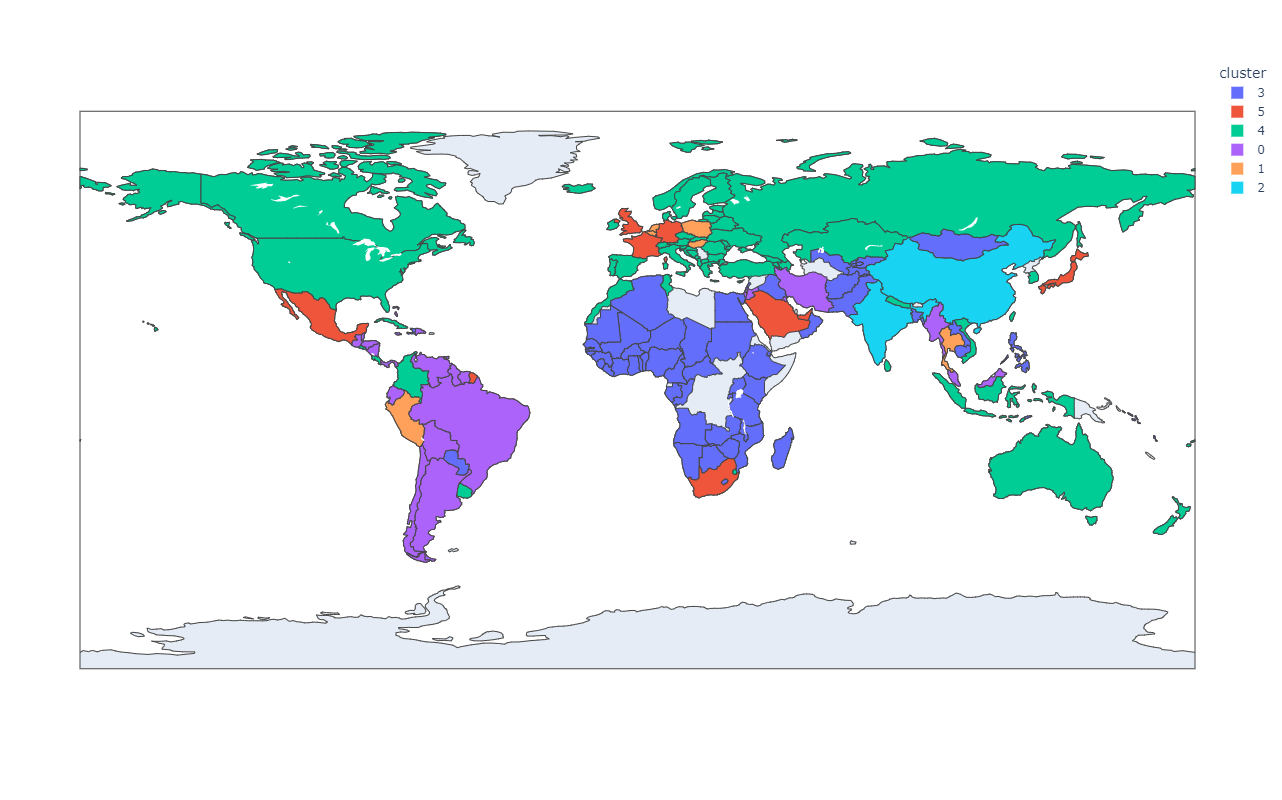

In [27]:
bilan_1_map = pd.merge(bilan_1, iso_alpha, on='Zone')
df = px.data.gapminder().query("year==2007")
fig = px.choropleth(bilan_1_map, locations="iso",
                    color="cluster", 
                    hover_name="Zone", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,width=1000, height=800)
fig.show()

### Représentation des variables de chaque groupe après normalisation en visualisation heatmap

In [28]:
df5=bilan_1.groupby(['cluster'],as_index= True)["Importations - Quantité",'production/nourriture (%)',
                                       'nourrVolaille/nourritTotal (%)','evo_demo_2012_2017(%)','Nbr pop','SFFA'].mean()

<AxesSubplot:ylabel='cluster'>

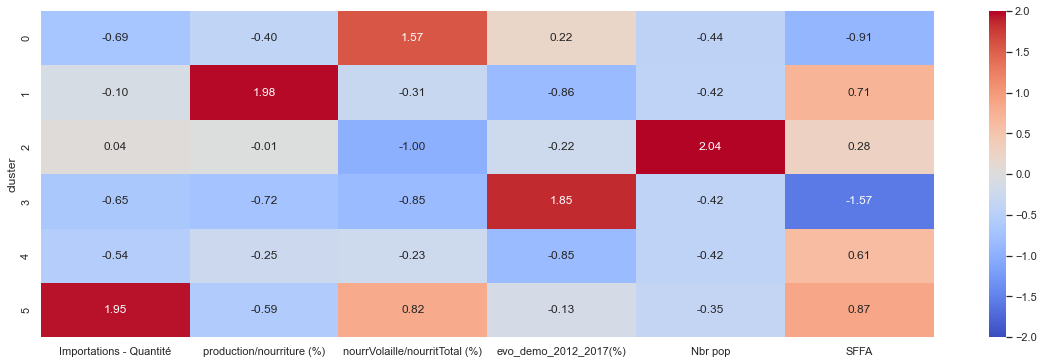

In [29]:

# La normalisation des moyenne
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm2 = mean_norm(df5)
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_mean_norm2, vmin=-2, vmax=2, annot=True, cmap="coolwarm", fmt="0.2f")

### Représentation de la distribution des variables par groupe en utilisant une boite à moustache

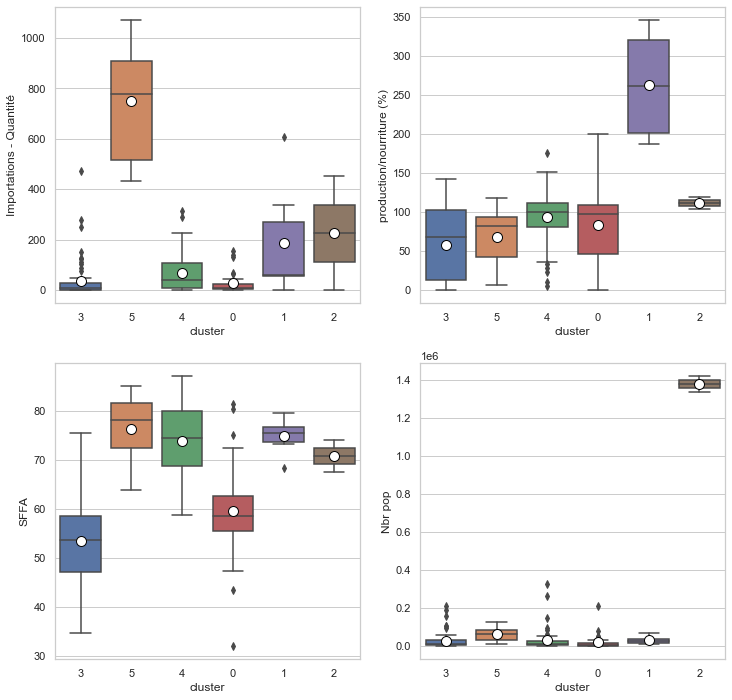

In [30]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=bilan_1, x='cluster', y='Importations - Quantité', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.subplot(222)
sns.boxplot(data=bilan_1, x='cluster', y='production/nourriture (%)', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.subplot(223)
sns.boxplot(data=bilan_1, x='cluster', y='SFFA', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.subplot(224)
sns.boxplot(data=bilan_1, x='cluster', y='Nbr pop', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.savefig('Distribution des variables par groupe 2.jpg')

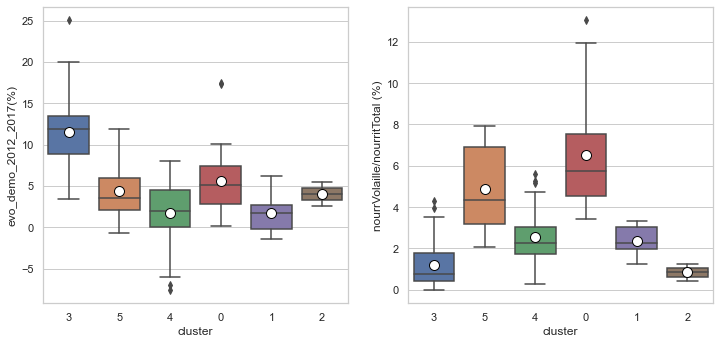

In [31]:
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=bilan_1, x='cluster', y='evo_demo_2012_2017(%)', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.subplot(222)
sns.boxplot(data=bilan_1, x='cluster', y='nourrVolaille/nourritTotal (%)', showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.savefig('Distribution des variables par groupe_suite 2.jpg')

### Observations

Nous cherchons le groupe  qui se caractérise en ordre de priorité par: 

     1. Quantité importante d'importation
     2. Rapport "production/nourriture" bas 
     3. Score de facilité à faire des affaires élevées
     4. Nombre de populations élevées
     5. Taux de croissance démographique élevé
     6. Rapport "nourritureVollaile / nourritureTotal" élevé

     
En analysant la heatmap et les représentations en boîte à moustache, on retient que le groupe 5, satisfait le plus nos critères.

Groupe 5 : 'Afrique du Sud', 'Allemagne', 'Arabie saoudite',
       'Chine - RAS de Hong-Kong', 'France', 'Japon', 'Mexique',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'Émirats arabes unis'.
       
     
     

## Comparaison des résultats des deux méthodes de clustering

In [32]:
# La correspondance
pd.crosstab(clusters_km,groupes_cah)

col_0   1  2  3   4  5   6
row_0                     
0       3  0  0  24  0   4
1       0  0  0   0  3   3
2       0  2  0   0  0   0
3      58  0  0   0  0   2
4       2  0  0   2  0  51
5       0  0  8   0  0   1

Sur la méthode hiérarchique le choix est fait sur le groupe 3; avec la méthode K-Means, le choix est fait pour le cluster 5. Les correspondances ci-dessus montrent une similitude entre les  deux approches.

Les deux méthodes sont très utilisées en clustering, cependant Il n'est pas nécessaire de spécifier un nombre de clusters initiaux pour lancer l'algorithme avec la classification hiérarchique contrairement à la méthode K-means.

# ACP 

###  Diagramme de l’éboulis des valeurs propres

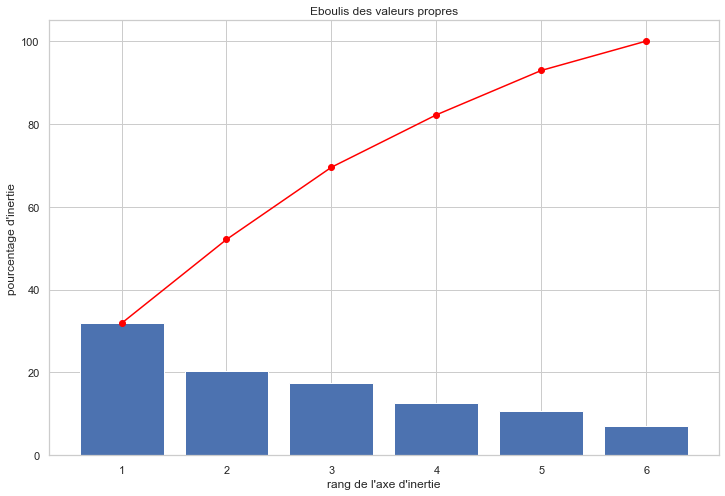

In [33]:
bilan.drop(["cluster"], axis=1,inplace = True)
pca = decomposition.PCA().fit(X_cr) #sklearn
# Eboulis des valeurs propres
varexpl = pca.explained_variance_ratio_*100
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 4 premières composantes. 

In [34]:
print(varexpl)

[31.86454918 20.23359345 17.44257287 12.65628795 10.71569379  7.08730276]


In [35]:
scree_cum = varexpl.cumsum().round()
scree_cum

array([ 32.,  52.,  70.,  82.,  93., 100.])

Les 2 premières composantes *captent* donc `52%` de la variance, les 3 premières `70%` de la variance etc.

Dans le jargon, cela s'appelle une *somme cumulée*. 

### Composantes

La formule de ce calcul nous est donnée par l'attribut `components_` : 

In [36]:
#la matrice de corrélation

t=pca.components_[:]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4','F5','F6'],columns=bilan.columns)
df_corr_comp.head(6).round(2)


Importations - Quantité  production/nourriture (%)  \
F1                     0.35                       0.36   
F2                    -0.11                       0.49   
F3                     0.66                      -0.38   
F4                    -0.57                      -0.11   
F5                     0.16                       0.69   
F6                    -0.28                      -0.04   

    nourrVolaille/nourritTotal (%)  evo_demo_2012_2017(%)  Nbr pop  SFFA  
F1                            0.23                  -0.56     0.15  0.60  
F2                           -0.69                   0.10     0.52 -0.00  
F3                            0.09                   0.28     0.57 -0.07  
F4                            0.45                  -0.24     0.62 -0.16  
F5                            0.49                   0.37    -0.03 -0.34  
F6                            0.15                   0.63     0.05  0.70

Et pour une représentation plus *visuelle*, comme cela : 

<AxesSubplot:>

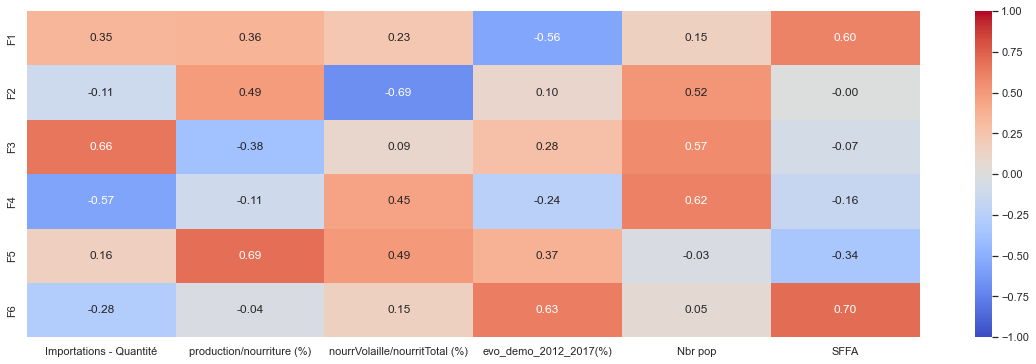

In [37]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_corr_comp, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### Cercle des corrélations

In [38]:
def cerle_corr(t, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            #fig, ax = plt.subplots(figsize=(12,(n_comp*2)))
            #ax.set_aspect('equal', adjustable='box')
            fig=plt.figure(figsize=(12,12))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box')

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            else :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
        
            # affichage des flèches
            plt.quiver(np.zeros(t.shape[1]), np.zeros(t.shape[1]),
                   t[d1,:], t[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(t[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

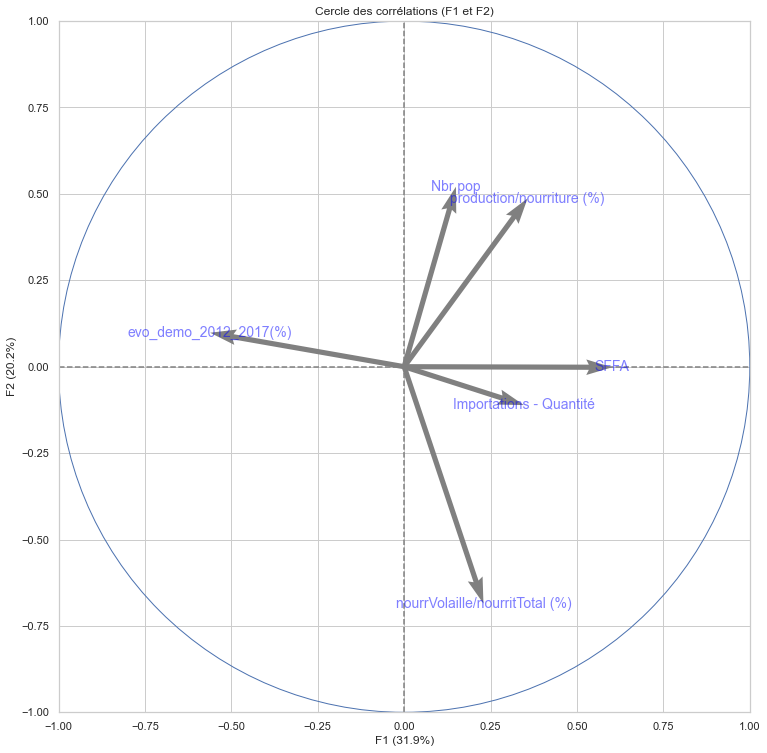

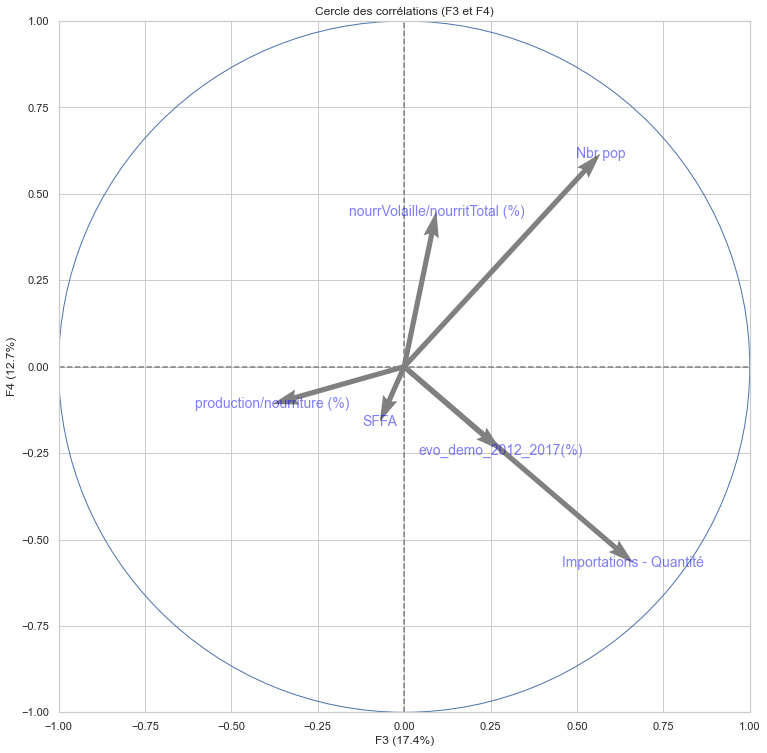

In [39]:
cerle_corr(t, 4, pca, [(0,1),(2,3)], labels = np.array(bilan.columns))

Observation



  - F1 :
      - Variables corrélées positivement:  SFFA, production/nourriture (%), Importations - Quantité
      - Variables corrélées positivement:  evo_demo_2012_2017(%)
  
  - F2 : 
      - Variables corrélées positivement : production/nourriture (%), Nbr pop
      - Variables corrélées négativement : nourrVolaille/nourritTotal (%), Importations - Quantité
 
 

  - F3 :
      - Variables corrélées positivement : Importations - Quantité, Nbr pop, , evo_demo_2012_2017(%)
      - Variables corrélées négativement : production/nourriture (%), 
      
  - F4 : 
      - variables corrélées positivement : nourrVolaille/nourritTotal (%), Nbr pop
      - variables corrélées négativement : Importations - Quantité, production/nourriture (%), evo_demo_2012_2017(%), SFFA
      
F1 = représentatif des pays développés qui importent de grandes quantités de volailles

F2 = représentatif des pays dits émergents qui importent une moyenne quantité de volailles

F3 = représentatif des pays dits émergents qui importent de grandes quantités de volailles

F4 = représentatif des pays en voie de développement qui importent une faible quantité de volailles









### Projection des clusters CAH

In [41]:
# Affichage sur plusieurs plans factoriels avec inertie des axes.
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, centroid=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Affichage des positions des centres de classes
            if centroid is not None:
                centroids = km.cluster_centers_
                centroids_projected = pca.transform(centroids)
                for j,(x1,y1) in enumerate(centroids_projected[:,[d1,d2]]):
                    plt.scatter(x1,y1, c = 'red', marker='x', s=200, label="Centroides")
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontsize=22)
            plt.show(block=False)

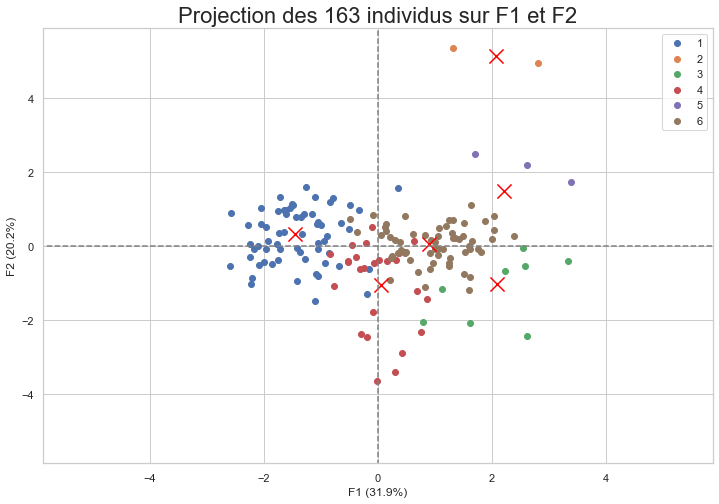

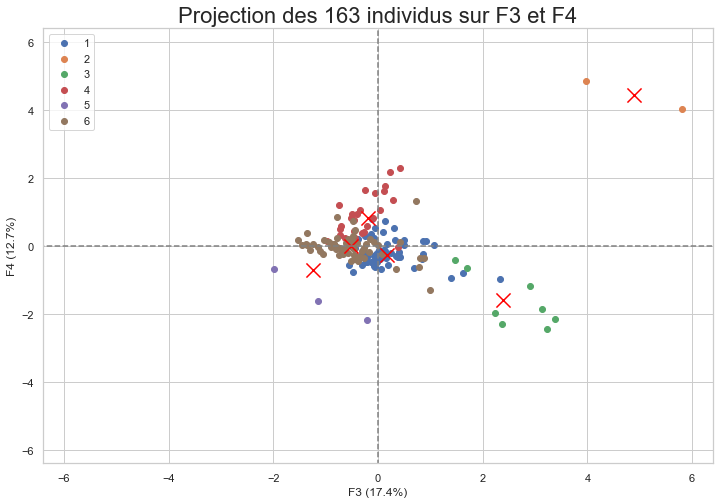

In [42]:
X_projected = pca.transform(X_cr)
plot_plans_factoriels(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = groupes_cah, centroid=1)

### Projection des clusters K-means

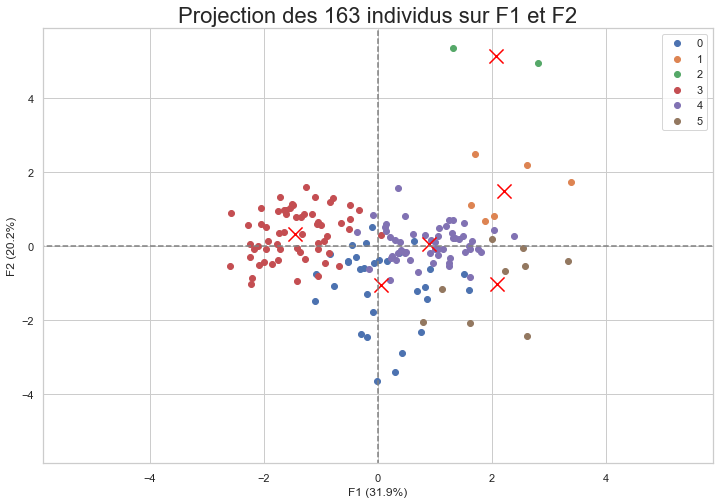

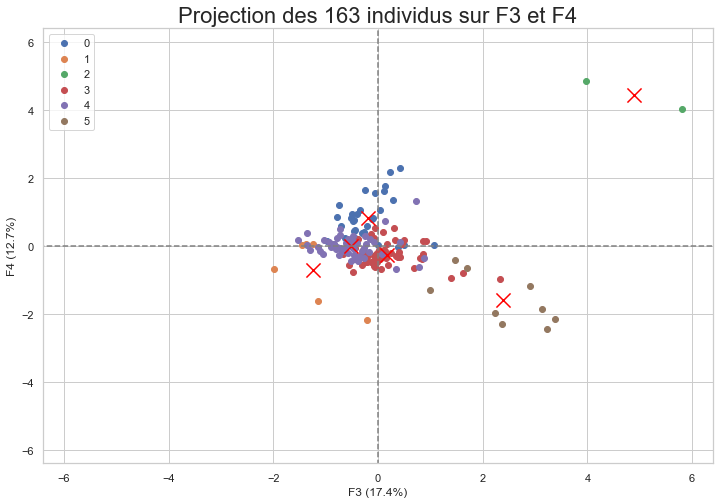

In [43]:
plot_plans_factoriels(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = clusters_km, centroid=1)

Observation

### OBSERVATIONS

on peut observer sur la projection des clusters avec la methode CAH sur l'axe F1 et F2 un groupe vert, positif sur l'axe F1 et négatif sur l'axe F2


Ce cluster présente bien les critères suivants :

     1. Quantité importante d'importation
     2. Rapport "production / nourriture" bas 
     3. Score de facilité à faire des affaires élevées
     4. Nombre de populations élevées
     5. Taux de croissance démographique élevé
     6. Rapport "nourritureVollaile / nourritureTotale" élevé


# Conclusions

Le groupe de pays qui correspond au critères de selection est le groupe 3(Méthode CAH).
Dans ce groupe on retrouve ces pays :
 

        'Afrique du Sud',
        'Allemagne',
        'Arabie saoudite',
        'Chine - RAS de Hong-Kong',
        'Japon',
        'Mexique',
        'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
        'Émirats arabes unis'.
    


Cette liste peut être affinée en ajoutant d'autres indicateurs et données relatives au métier.